In [1]:
import numpy as np
import pandas as pd
import misc
import matplotlib.pyplot as plt
from misc import get_attr
import time
pd.set_option('mode.chained_assignment', None)
from framework import tester, strategy
from environments.gym_env import TradingEnv



In [2]:
spy_df = pd.read_csv('stock_price_data/SPY.csv')
spy_df = misc.clean_df(spy_df)
spy_df

,date,open,high,low,close,adjclose,volume,ticker
0,1993-01-29,43.968750,43.968750,43.750000,43.937500,25.218206,1003200,SPY
1,1993-02-01,43.968750,44.250000,43.968750,44.250000,25.397572,480500,SPY
2,1993-02-02,44.218750,44.375000,44.125000,44.343750,25.451397,201300,SPY
3,1993-02-03,44.406250,44.843750,44.375000,44.812500,25.720430,529400,SPY
4,1993-02-04,44.968750,45.093750,44.468750,45.000000,25.828049,531500,SPY
...,...,...,...,...,...,...,...,...
7581,2023-03-09,399.739990,401.480011,390.529999,391.559998,391.559998,111945300,SPY
7582,2023-03-10,390.989990,393.160004,384.320007,385.910004,385.910004,189105300,SPY
7583,2023-03-13,381.809998,390.390015,380.649994,385.359985,385.359985,157790000,SPY
7584,2023-03-14,390.500000,393.450012,387.049988,391.730011,391.730011,149752400,SPY


c:\Users\alexr\AppData\Local\Programs\Python\Python38\lib\site-packages\gym\spaces\box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float64
  logger.warn(
c:\Users\alexr\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\alexr\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\alexr\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


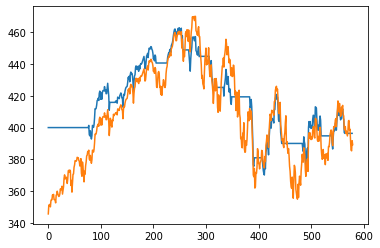

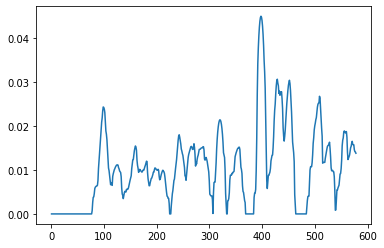

In [3]:
class ma_crossover_policy:
    def __init__(self):
        pass
    def learn(self, timesteps):
        pass
    def predict(self, obs, deterministic=False, **kwargs):
        '''
        input_arr = ADJC, S, S+1
        trader_state = cash, position, position_value, portfolio_value, margin
        '''
        buy_threshold = get_attr(kwargs, 'buy_threshold', 0)
        sell_threshold = get_attr(kwargs, 'sell_threshold', 0)
        cash, position, _, _, _, _ = obs[-6:]
        adjclose, signal, signal_1 = obs[:3]

        # print(cash, position)
        

        limit_order = np.zeros(2)
        if  signal > buy_threshold and signal_1 < buy_threshold:
            limit_order[0] = adjclose
            limit_order[1] = cash // adjclose
        elif signal < sell_threshold and signal_1 > sell_threshold:
            limit_order[0] = adjclose
            limit_order[1] = -position
        # print(limit_order)
        return limit_order, None

def ma_signal(df, **kwargs):
    
    short_period = get_attr(kwargs, 'short_period', 10)
    long_period = get_attr(kwargs, 'long_period', 20)

    df['signal'] = df['adjclose'].rolling(short_period).mean() - df['adjclose'].rolling(long_period).mean()
    df['signal+1'] = df['signal'].shift(1)
    df = df.dropna()

    return df



df = spy_df[-600:].copy()
df = ma_signal(df)
params = {
    'initial_capital': 1e6,
    'input_feature_list': ['adjclose', 'signal', 'signal+1']
}

# tdf = tdf[['date', 'adjclose', 'signal', 'signal+1']]


env = TradingEnv(df, **params)

# model = PPO(policy = "MlpPolicy",env=env, verbose=3, device='cuda')
# model.learn(total_timesteps=25000)

model = ma_crossover_policy()

obs = env.reset()
for i in range(600):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()
    if done:
    #   obs = env.reset()
      break

# print(env.records['portfolio_volatility'])

In [4]:

# model = PPO(policy = "MlpPolicy",env=env, verbose=3, device='cuda')
# model.learn(total_timesteps=25000)

# obs = env.reset()
# for i in range(600):
#     action, _state = model.predict(obs, deterministic=True)
#     obs, reward, done, info = env.step(action)
#     env.render()
#     if done:
#     #   obs = env.reset()
#       break


NameError: name 'PPO' is not defined

In [7]:
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')